In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('D:/Data/CourseraClass/gapminder.csv')
len(data)

213

Remove N/A records for variables of interest.

In [3]:
data['suicideper100th'] = data['suicideper100th'].replace(r'\s+', np.nan, regex=True)
data['internetuserate'] = data['internetuserate'].replace(r'\s+', np.nan, regex=True)
data['incomeperperson']= data['incomeperperson'].replace(r'\s+', np.nan, regex=True)
data['employrate']= data['employrate'].replace(r'\s+', np.nan, regex=True)
data['urbanrate']= data['urbanrate'].replace(r'\s+', np.nan, regex=True)
data['alcconsumption']= data['alcconsumption'].replace(r'\s+', np.nan, regex=True)
data_clean = data.dropna(subset = ['suicideper100th', 'internetuserate', 'incomeperperson', 'employrate', 'urbanrate','alcconsumption'])
len(data_clean)

160

Make sure the fields are numbers

In [4]:
data_clean['suicideper100th'] = data_clean['suicideper100th'].convert_objects(convert_numeric=True)
data_clean['internetuserate'] = data_clean['internetuserate'].convert_objects(convert_numeric=True)
data_clean['incomeperperson'] = data_clean['incomeperperson'].convert_objects(convert_numeric=True)
data_clean['employrate'] = data_clean['employrate'].convert_objects(convert_numeric=True)
data_clean['urbanrate'] = data_clean['urbanrate'].convert_objects(convert_numeric=True)
data_clean['alcconsumption'] = data_clean['alcconsumption'].convert_objects(convert_numeric=True)
data_clean.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
1,Albania,1914.996551,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.989947,76.918,,9,636.341383366604,7.699330,51.400002,46.72
2,Algeria,2231.993335,0.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.500073,73.131,.42009452521537,2,590.509814347428,4.848770,50.500000,65.22
4,Angola,1381.004268,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.999954,51.093,,-2,172.999227388199,14.554677,75.699997,56.70
6,Argentina,10749.419238,9.35,.560987,73.9,5872119000,45.9000015258789,.5,36.000335,75.901,.635943800978195,8,768.428299701347,7.765584,58.400002,92.00
7,Armenia,1326.741757,13.66,2.6184384,51.6,51219666.6666667,34.2000007629394,.1,44.001025,74.241,,5,603.763057563433,3.741588,40.099998,63.86


Create categorial response based on percentiles. Those in the lower 50 percentile will be coded 1 to indicate low rate. Those in the upper 50 percentile will be coded as 2 to indicate high rate.

In [5]:
print (round(np.percentile(data_clean['suicideper100th'],25)))
print (round(np.percentile(data_clean['suicideper100th'],50)))
print (round(np.percentile(data_clean['suicideper100th'],75)))

6.0
9.0
13.0


In [6]:
data_clean['suiciderate'] = 0
data_clean['suiciderate'][(data_clean['suicideper100th']>=9)] = 2
data_clean['suiciderate'][(data_clean['suicideper100th']< 9)] = 1

## Modeling and Prediction

### Split into training and testing sets

In [7]:
predictors = data_clean[['internetuserate', 'incomeperperson', 'employrate', 'urbanrate','alcconsumption']]
targets = data_clean.suiciderate
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.4)

### View the splits

In [8]:
print (pred_train.shape)
print (pred_test.shape)
print (tar_train.shape)
print (tar_test.shape)

(96, 5)
(64, 5)
(96,)
(64,)


### Build model on training data

In [9]:
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

### Check the stats of the model

In [10]:
predictions=classifier.predict(pred_test)
print (sklearn.metrics.confusion_matrix(tar_test,predictions))
print (sklearn.metrics.accuracy_score(tar_test, predictions))

[[20 11]
 [10 23]]
0.671875


### Displaying the decision tree

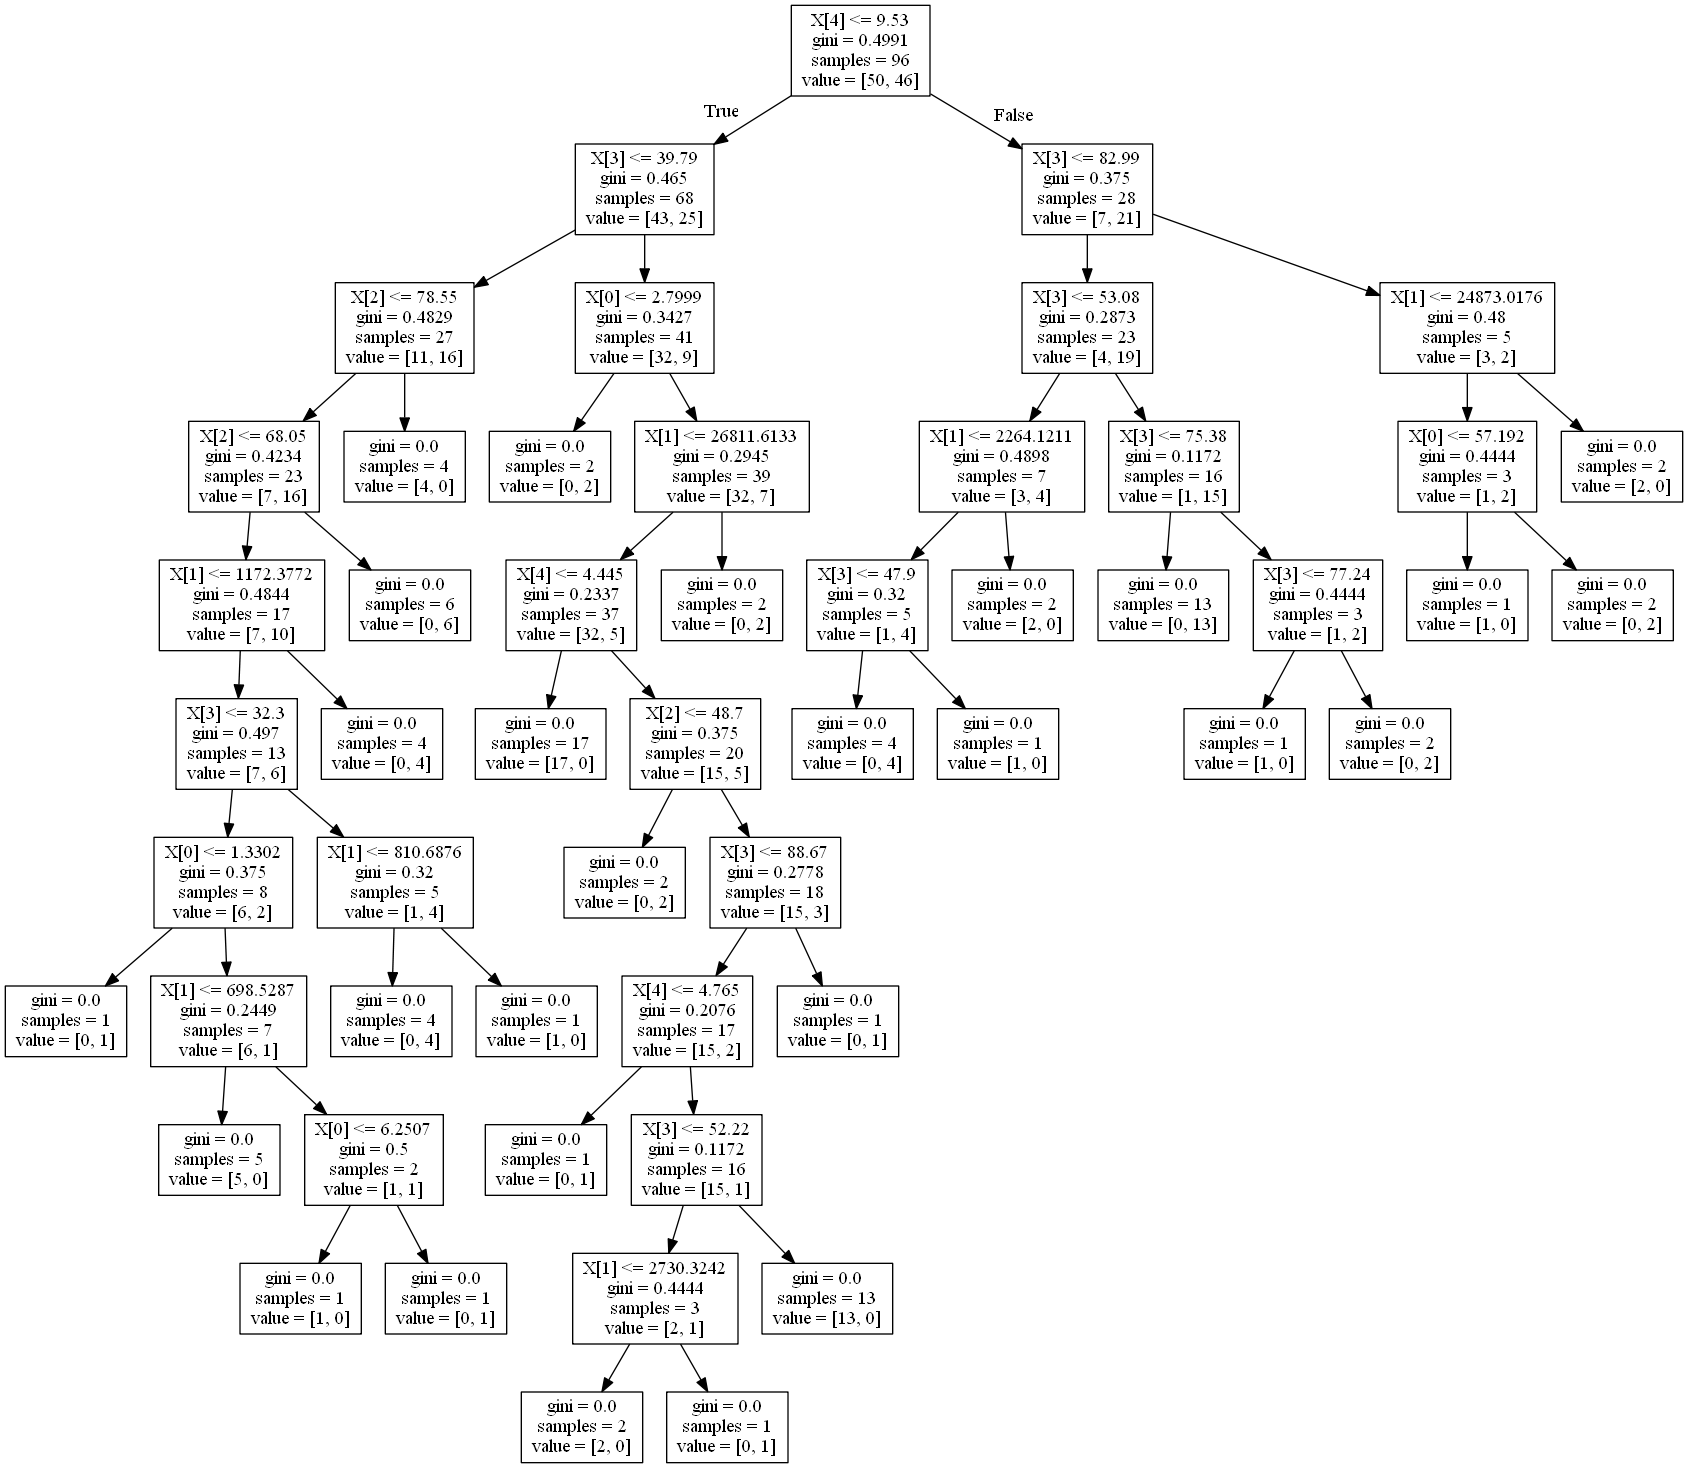

In [11]:
from sklearn import tree
from io import StringIO
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

X0 internetuserate

X1 incomeperperson

X2 employmentrate

X3 urbanrate

X4 alcconsumption

Decision tree analysis was performed to test nonlinear relationships among a series of explanatory variables and a binary, categorical response variable. All possible separations (categorical) or cut points (quantitative) are tested. For the present analyses, the entropy “goodness of split” criterion was used to grow the tree and a cost complexity algorithm was used for pruning the full tree into a final subtree.


The following explanatory variables were included as possible contributors to a classification tree model evaluating suicide rate (my response variable), internet usage rate, income per person, employment rate, urban rate, and alcohol consumption. 